In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# Estudo complementar sobre dataset Global Superstore

Estudo complementar sobre o dataset Global Superstore realizado **após** a data limite acordada para a entrega do desafio. Feito apenas para relembrar e treinar conceitos que talvez não estivessem sendo praticados há algum tempo.

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

In [5]:
plt.style.use('fivethirtyeight')

In [6]:
# Importar dados para DataFrame
# !ls
df = pd.read_excel("./data/global_superstore.xls", index_col="Order Date")

In [7]:
df.columns

Index(['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Country', 'Postal Code',
       'Market', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 51290 entries, 2012-07-31 to 2012-05-22
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Ship Date       51290 non-null  datetime64[ns]
 3   Ship Mode       51290 non-null  object        
 4   Customer ID     51290 non-null  object        
 5   Customer Name   51290 non-null  object        
 6   Segment         51290 non-null  object        
 7   City            51290 non-null  object        
 8   State           51290 non-null  object        
 9   Country         51290 non-null  object        
 10  Postal Code     9994 non-null   float64       
 11  Market          51290 non-null  object        
 12  Region          51290 non-null  object        
 13  Product ID      51290 non-null  object        
 14  Category        51290 non-null  objec

In [9]:
df = df.sort_index()
df[:3]

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01-01,48883,HU-2011-1220,2011-01-05,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
2011-01-01,22253,IN-2011-47883,2011-01-08,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2011-01-01,42433,AG-2011-2040,2011-01-06,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium


### Evolução do número de vendas ao longo do tempo

In [10]:
df_orders_by_date = pd.DataFrame(df['Order ID'].groupby(df.index).count())

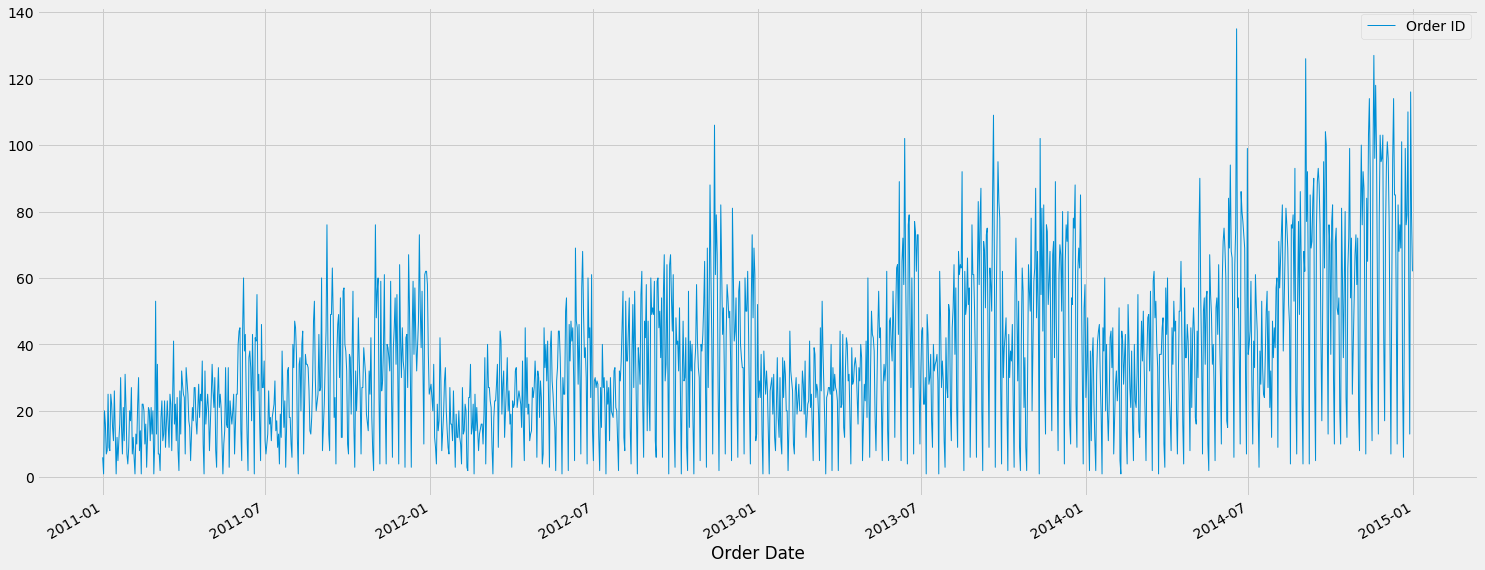

In [15]:
df_orders_by_date.plot(figsize=(23, 10), lw=1)

### Média móvel com janela de 7 dias ao longo do tempo

Confirma tendência de crescimento no número de pedidos ao longo do tempo. Há forte sazonalidade.

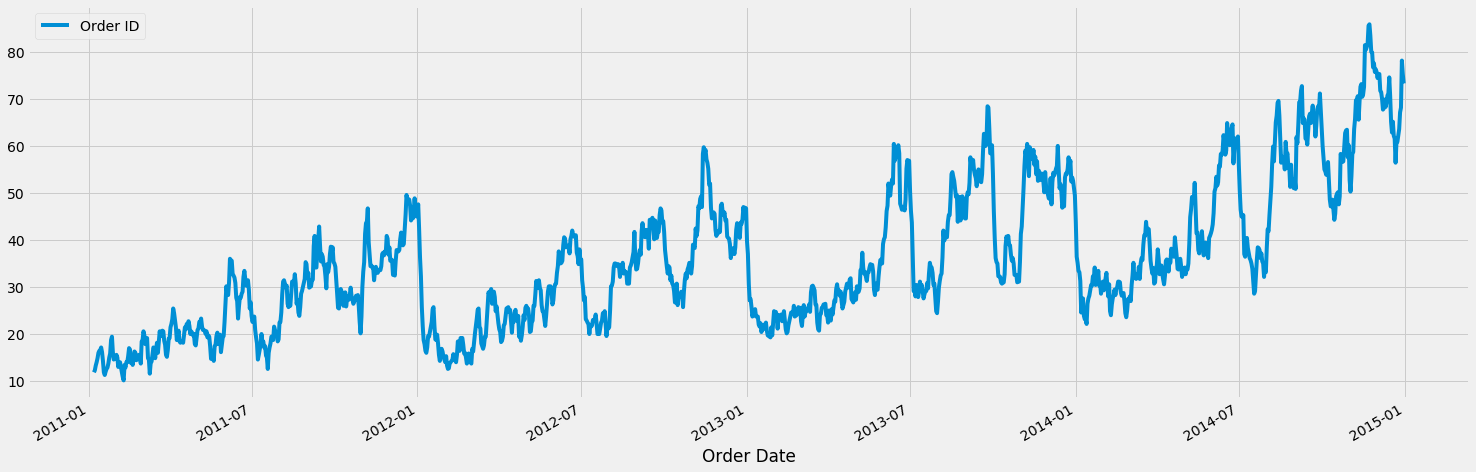

In [17]:
df_orders_by_date_rolling_mean = df_orders_by_date.rolling(7).mean()
df_orders_by_date_rolling_mean.plot(figsize=(23, 8))
plt.show()

### Número de países que fazem comércio

In [18]:
print("Países que fazem comércio: %d" % len(df['Country'].unique()))

Países que fazem comércio: 147


### Top 30 países que mais fazem comércio

In [19]:
orders_by_country = pd.DataFrame(df.groupby('Country').count().sort_values(by='Order ID', ascending=False)['Order ID'])[:30]

In [20]:
orders_by_country.rename(columns={'Order ID':'Total Orders'}, inplace=True)

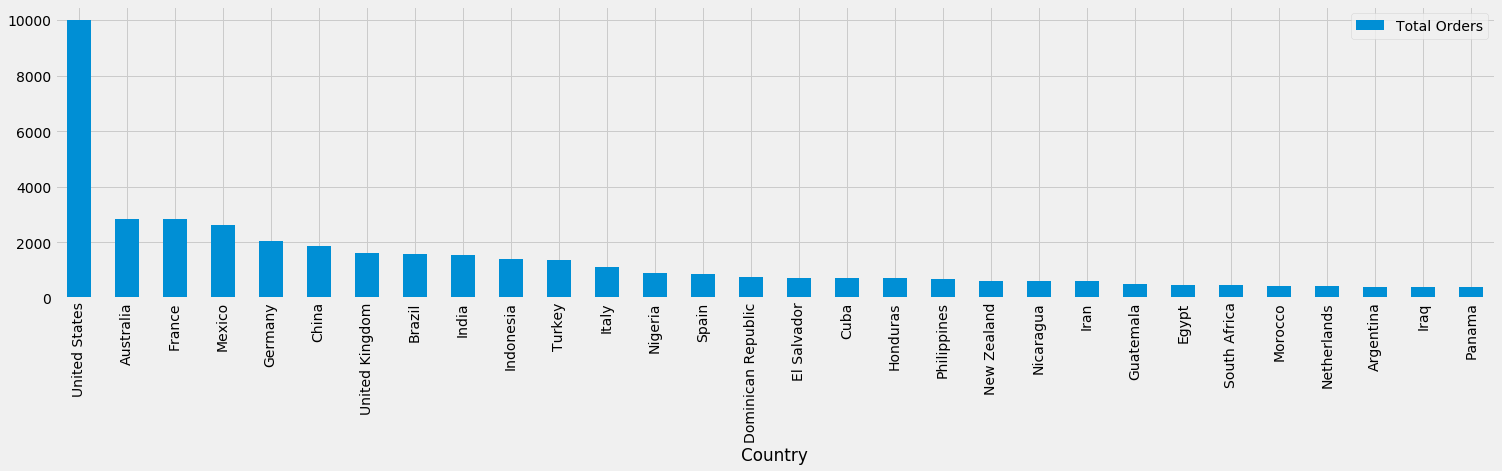

In [21]:
orders_by_country.plot(kind="bar", figsize=(23, 5))

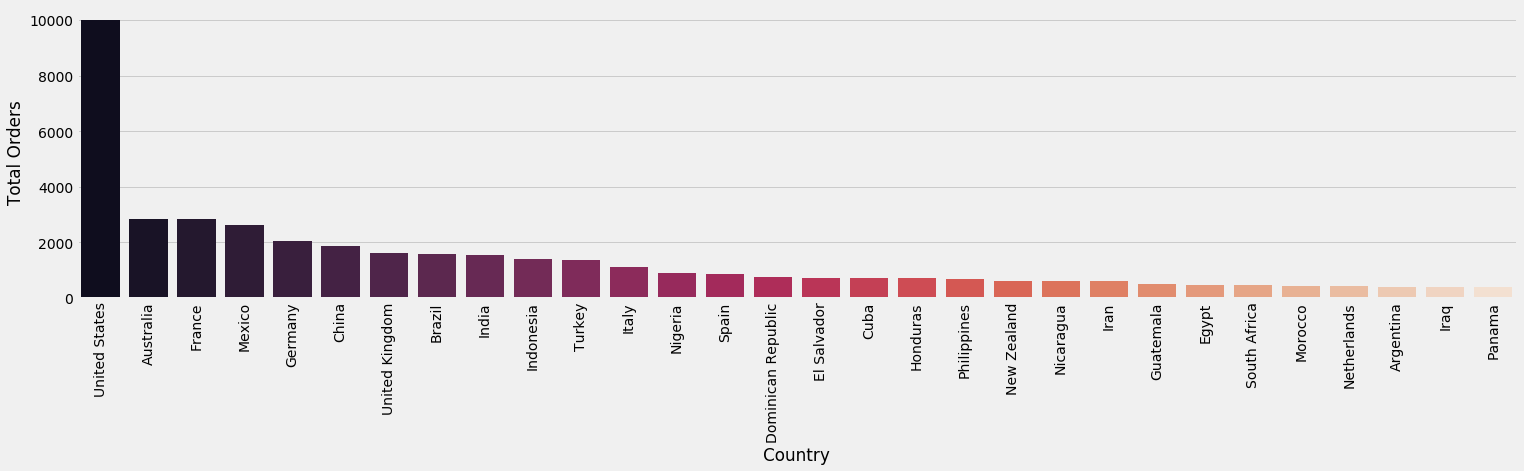

In [22]:
# Teste usando Seaborn
plt.figure(figsize=(23,5))
plt.xticks(rotation=90)
sns.barplot(data=orders_by_country, y='Total Orders', x=orders_by_country.index, palette='rocket')

In [23]:
top_30_countries_in_orders = orders_by_country.index.values

### Evolução do número de pedidos dos 30 países com mais maior número de pedidos

In [24]:
df.reset_index(inplace=True)

In [25]:
pv_orders_by_country = pd.DataFrame(df.groupby(['Order Date', 'Country'])['Order ID'].count())

In [26]:
pv_orders_by_country.reset_index(inplace=True)
pv_orders_by_country.set_index('Order Date', inplace=True)

In [27]:
pv_orders_by_country = pv_orders_by_country[pv_orders_by_country['Country'].isin(top_30_countries_in_orders)]

In [28]:
order_count = pv_orders_by_country.pivot_table('Order ID', aggfunc=np.sum, columns='Country', index=pv_orders_by_country.index, fill_value=0)

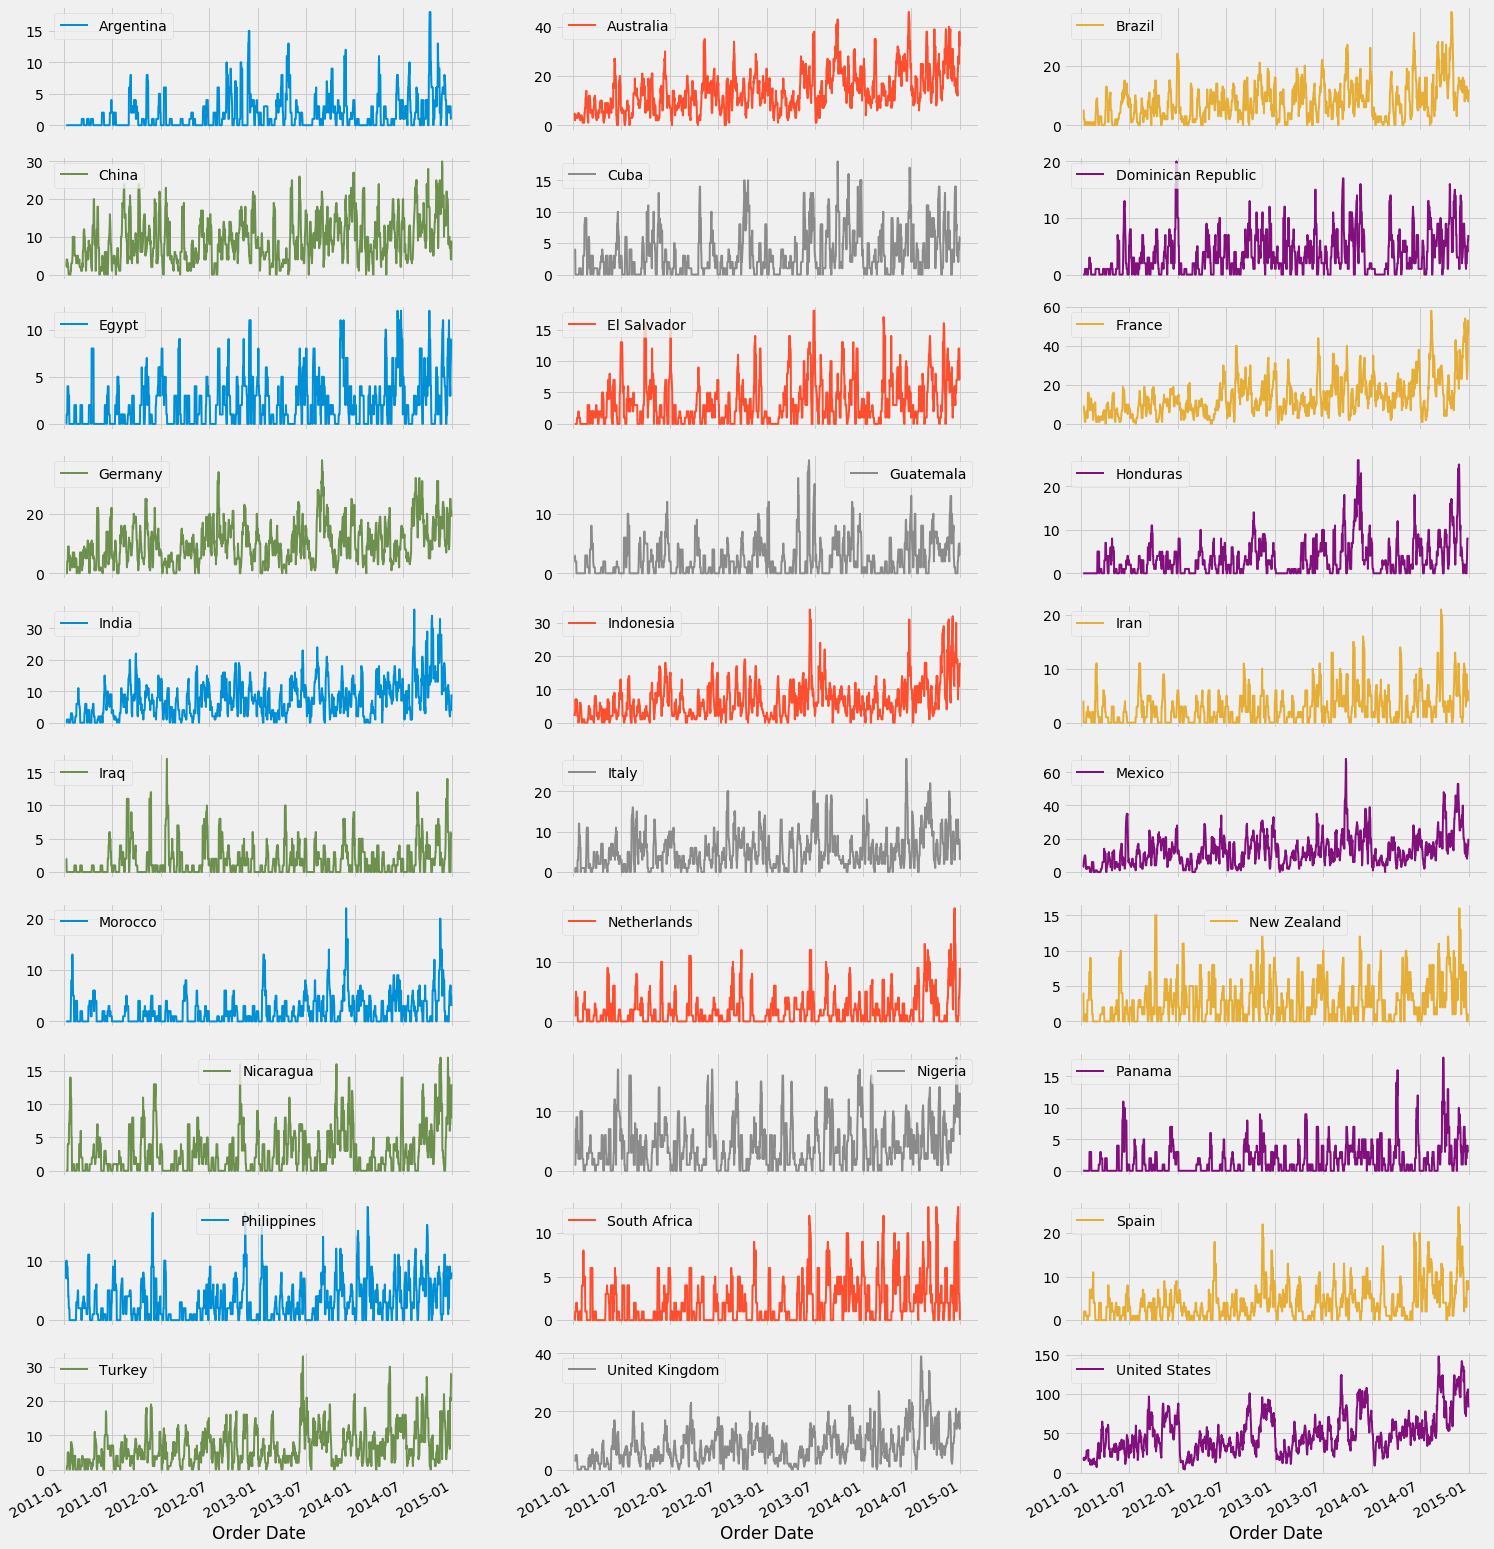

In [31]:
plo = order_count.rolling(7).sum().plot(figsize=(23, 30), subplots=True, layout=(-1, 3), sharex=True, sharey=False, lw=2)

In [32]:
df2 = df[['Segment', 'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']]

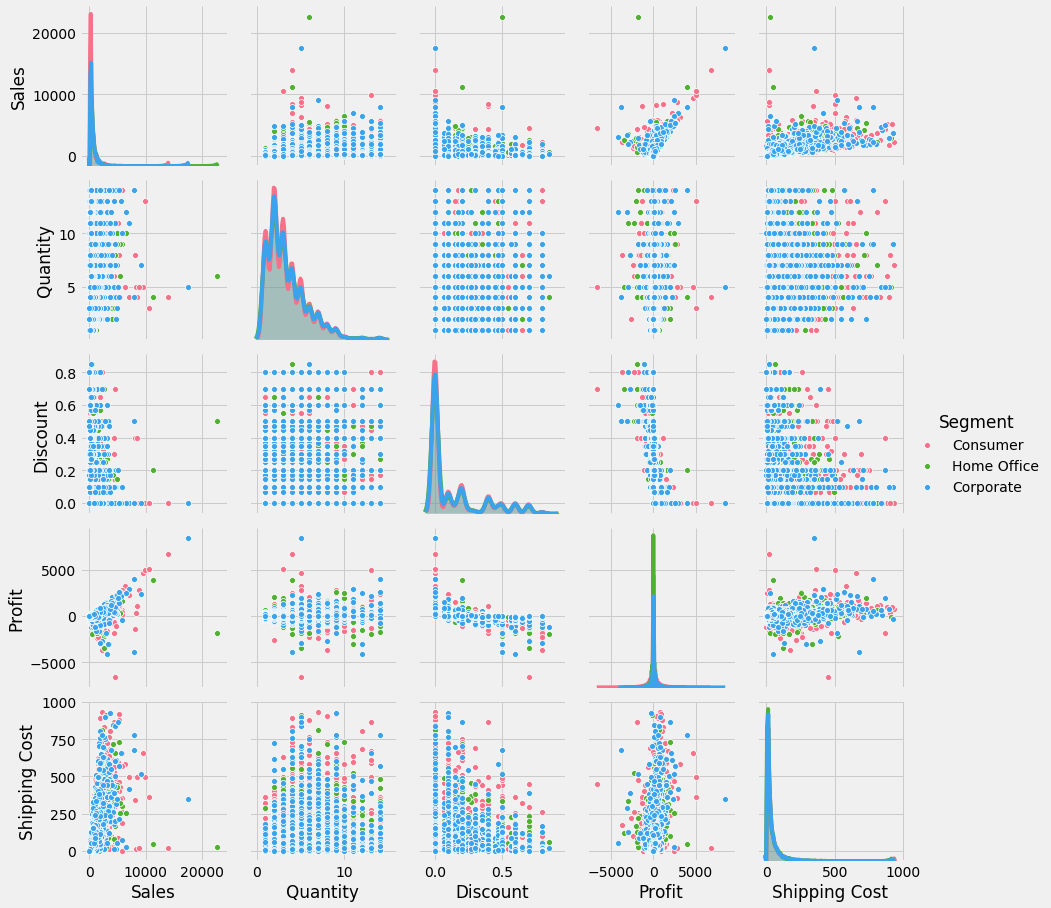

In [33]:
sns.pairplot(df2, hue='Segment', palette='husl')

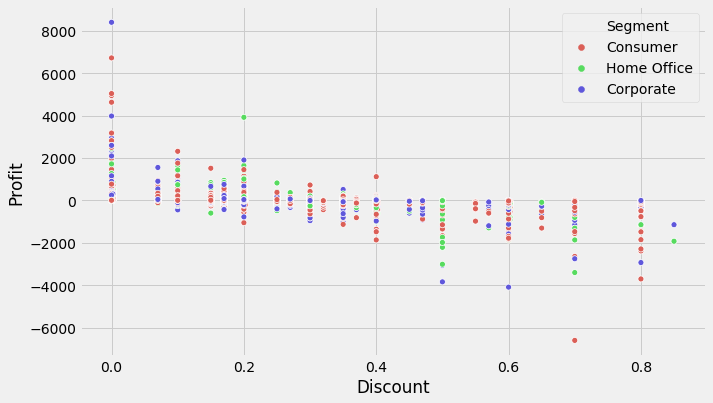

In [34]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df2, x='Discount', y='Profit', hue='Segment', palette='hls')

# Timeseries Forecast com Fbprohet

In [35]:
from fbprophet import Prophet

In [36]:
from fbprophet.diagnostics import cross_validation, performance_metrics

In [37]:
import warnings
warnings.filterwarnings('ignore')

In [38]:
def mean_absolute_percentage_error(y_true, y_pred):
    '''Take in true and predicted values and calculate the MAPE score'''
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

### Preparação dos dados para criação do modelo

In [39]:
df_orders_by_date_rolling_mean.dropna(inplace=True)

In [40]:
df_orders_by_date_fc = df_orders_by_date_rolling_mean

In [41]:
df_orders_by_date_fc.reset_index(inplace=True)
df_orders_by_date_fc

,Order Date,Order ID
0,2011-01-07,11.857143
1,2011-01-08,12.285714
2,2011-01-09,13.285714
3,2011-01-10,14.000000
4,2011-01-11,14.857143
...,...,...
1419,2014-12-27,67.142857
1420,2014-12-28,68.142857
1421,2014-12-29,78.142857
1422,2014-12-30,75.285714


In [42]:
df_orders_by_date_fc.rename(columns={'Order Date': 'ds', 'Order ID': 'y'}, inplace=True)
df_orders_by_date_fc

,ds,y
0,2011-01-07,11.857143
1,2011-01-08,12.285714
2,2011-01-09,13.285714
3,2011-01-10,14.000000
4,2011-01-11,14.857143
...,...,...
1419,2014-12-27,67.142857
1420,2014-12-28,68.142857
1421,2014-12-29,78.142857
1422,2014-12-30,75.285714


In [43]:
model = Prophet()

In [44]:
model.fit(df_orders_by_date_fc)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [45]:
future = model.make_future_dataframe(freq='D', periods=365)
future.tail()

,ds
1784,2015-12-27
1785,2015-12-28
1786,2015-12-29
1787,2015-12-30
1788,2015-12-31


In [46]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1784,2015-12-27,89.674906,83.131271,96.809656
1785,2015-12-28,89.390979,82.948687,96.635252
1786,2015-12-29,88.575437,82.168237,95.565817
1787,2015-12-30,87.626307,80.618976,94.533048
1788,2015-12-31,86.605533,79.530623,93.491611


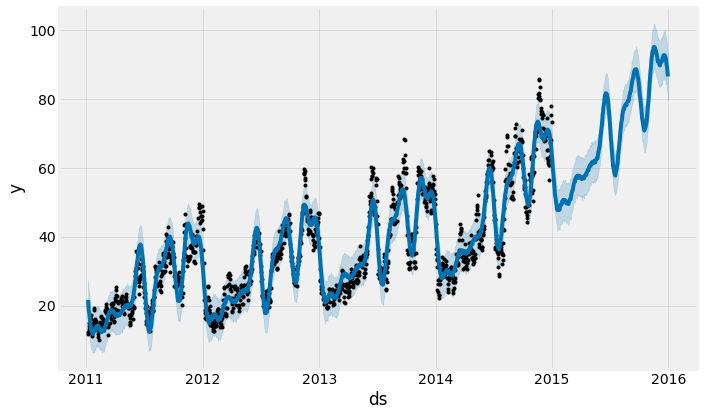

In [47]:
fig1 = model.plot(forecast)

In [51]:
%time
cv_results = cross_validation(model, horizon='7 days')

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs


INFO:fbprophet:Making 310 forecasts with cutoffs between 2012-01-07 12:00:00 and 2014-12-24 00:00:00


In [52]:
%time
mape_baseline = mean_absolute_percentage_error(cv_results.y, cv_results.yhat)
print(mape_baseline)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 6.2 µs
11.258480850104487


In [53]:
performance_metrics(cv_results)

,horizon,mse,rmse,mae,mape,coverage
0,1 days 00:00:00,26.379800,5.136127,3.755209,0.105107,0.723680
1,1 days 12:00:00,27.911324,5.283117,3.844686,0.108450,0.722581
2,2 days 00:00:00,27.891268,5.281218,3.843457,0.105044,0.717886
3,2 days 12:00:00,29.991104,5.476413,3.936653,0.112141,0.725519
4,3 days 00:00:00,28.670042,5.354441,3.836061,0.106157,0.729032
5,3 days 12:00:00,31.499005,5.612397,4.172636,0.118288,0.682084
6,4 days 00:00:00,30.626963,5.534163,4.052623,0.111704,0.686264
7,4 days 12:00:00,32.371261,5.689575,4.164034,0.117588,0.673591
8,5 days 00:00:00,32.981253,5.742931,4.169335,0.115272,0.687990
9,5 days 12:00:00,33.016795,5.746024,4.198663,0.115570,0.701469


### Quais produtos são mais vendidos em conjuntos?

In [54]:
df_sold_tgt = df[df['Order ID'].duplicated(keep=False)]

df_sold_tgt['Grouped'] = df_sold_tgt.groupby('Order ID')['Product Name'].transform(lambda x: '/'.join(x))

df_sold_tgt = df_sold_tgt[['Order ID', 'Grouped']].drop_duplicates()

df_sold_tgt.head()

,Order ID,Grouped
1,IN-2011-47883,"Acme Trimmer, High Speed/Eaton Computer Printo..."
8,ID-2011-80230,"Hewlett Wireless Fax, Laser/Hon Rocking Chair,..."
12,IR-2011-770,"Breville Coffee Grinder, Black/Advantus Rubber..."
15,IZ-2011-4680,"Cameo Interoffice Envelope, Set of 50/Novimex ..."
17,IN-2011-65159,"Stockwell Staples, Metal/Tenex Lockers, Indust..."


In [55]:
from itertools import combinations
from collections import Counter

In [56]:
count = Counter()

for row in df_sold_tgt['Grouped']:
    row_list = row.split('/')
    
    # Segundo argumento da função combinations é a quantidade de combinações no qual queremos buscar.
    count.update(Counter(combinations(row_list, 4)))

# Exibe a lista com os X items mais comprados em conjunto.
for key, value in count.most_common(10):
    print(key, value)

('Adams Telephone Message Book W', 'Dividers', 'Space For Phone Numbers, 5 1', '4"X8 1') 14
('Adams Telephone Message Book W', 'Dividers', 'Space For Phone Numbers, 5 1', 'Messages') 14
('Adams Telephone Message Book W', 'Dividers', '4"X8 1', 'Messages') 14
('Adams Telephone Message Book W', 'Space For Phone Numbers, 5 1', '4"X8 1', 'Messages') 14
('Dividers', 'Space For Phone Numbers, 5 1', '4"X8 1', 'Messages') 14
('Adams Telephone Message Book W', 'Dividers', 'Space For Phone Numbers, 5 1', '2", 300') 8
('Adams Telephone Message Book W', 'Dividers', '4"X8 1', '2", 300') 8
('Adams Telephone Message Book W', 'Dividers', '2", 300', 'Messages') 8
('Adams Telephone Message Book W', 'Space For Phone Numbers, 5 1', '4"X8 1', '2", 300') 8
('Adams Telephone Message Book W', 'Space For Phone Numbers, 5 1', '2", 300', 'Messages') 8
